# Playground
This file is not part of the model. It is mainly used to look at the data, niche distributions, plotting, testing functions, debugging etc.

In [3]:
import scanpy as sc
from pathlib import Path
import sys

file_path = Path("data/adata_test_uncompressed.h5ad")
adata = sc.read(file_path)
print(adata)
print(adata.obs['sample'].unique())
print(adata.obs['Niche_NMF'].unique)
print(sys.getsizeof(adata))

AnnData object with n_obs × n_vars = 45273 × 1500
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fac

In [8]:
import numpy as np

# 4 healthy, 3 IPF, 4 randoms
sample_names = ['90_A1_H237762_IPF_processed_CM', '90_C1_RO-730_Healthy_processed_CM', '91_A1_RO-727_Healthy_processed_CM', '91_B1_RO-728_Healthy_processed_CM', '91_D1_24513-17_IPF_processed_CM', '92_D1_RO-3736_IPF_processed_CM', '92_A1_RO-3203_Healthy_processed_CM', '1217_0001_processed_aligned', '1217_0002_processed_aligned', '1217_0003_processed_aligned', '1217_0004_processed_aligned']
sample_counts = [len(adata.obs[adata.obs['sample'] == s]) for s in sample_names]
total_counts = np.sum(sample_counts)
sample_counts_norm = sample_counts/total_counts

print(sample_counts)
print(sample_counts_norm)
print(total_counts)

NameError: name 'adata' is not defined

In [7]:
# check out class distribution

from collections import Counter
from dataset import get_data

file_path = Path("data/adata_trainval_uncompressed.h5ad")
features, labels, _ = get_data(file_path)
unique_labels, counts = np.unique(labels, return_counts=True)
label_counts = Counter(labels)
print("Class Distribution:")
for label, count in zip(unique_labels, counts):
  print(f"Class {label}: {count}")


Class Distribution:
Class 0: 2876
Class 1: 21128
Class 2: 5328
Class 3: 2440
Class 4: 5100
Class 5: 728
Class 6: 908
Class 7: 6765


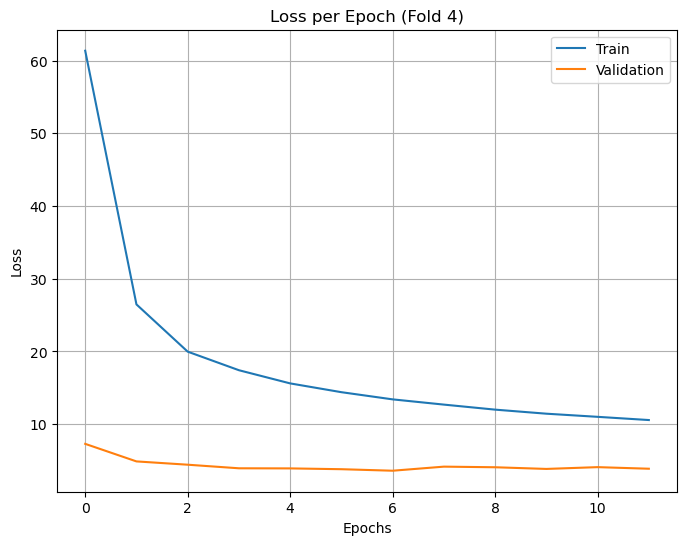

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("logs/4_Niche_classifier.csv", header=None)

# Filter data for fold 3
fold_3_data = df[(df[0] == 3)]

# Melt the dataframe for easier plotting
fold_3_melted = fold_3_data.melt(id_vars=[1], value_vars=[2, 3], var_name='Loss Type', value_name='Loss')
fold_3_melted['Loss Type'] = fold_3_melted['Loss Type'].replace({2: 'Train', 3: 'Validation'})

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=1, y='Loss', hue='Loss Type', data=fold_3_melted)
plt.title('Loss per Epoch (Fold 4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='')
plt.grid(True)
plt.show()